<a href="https://colab.research.google.com/github/LegendTejas/FootballMatchOutcomeAnalyzer/blob/main/FootballMatchOutcomeAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOOTBALL MATCH OUTCOME ANALYZER**

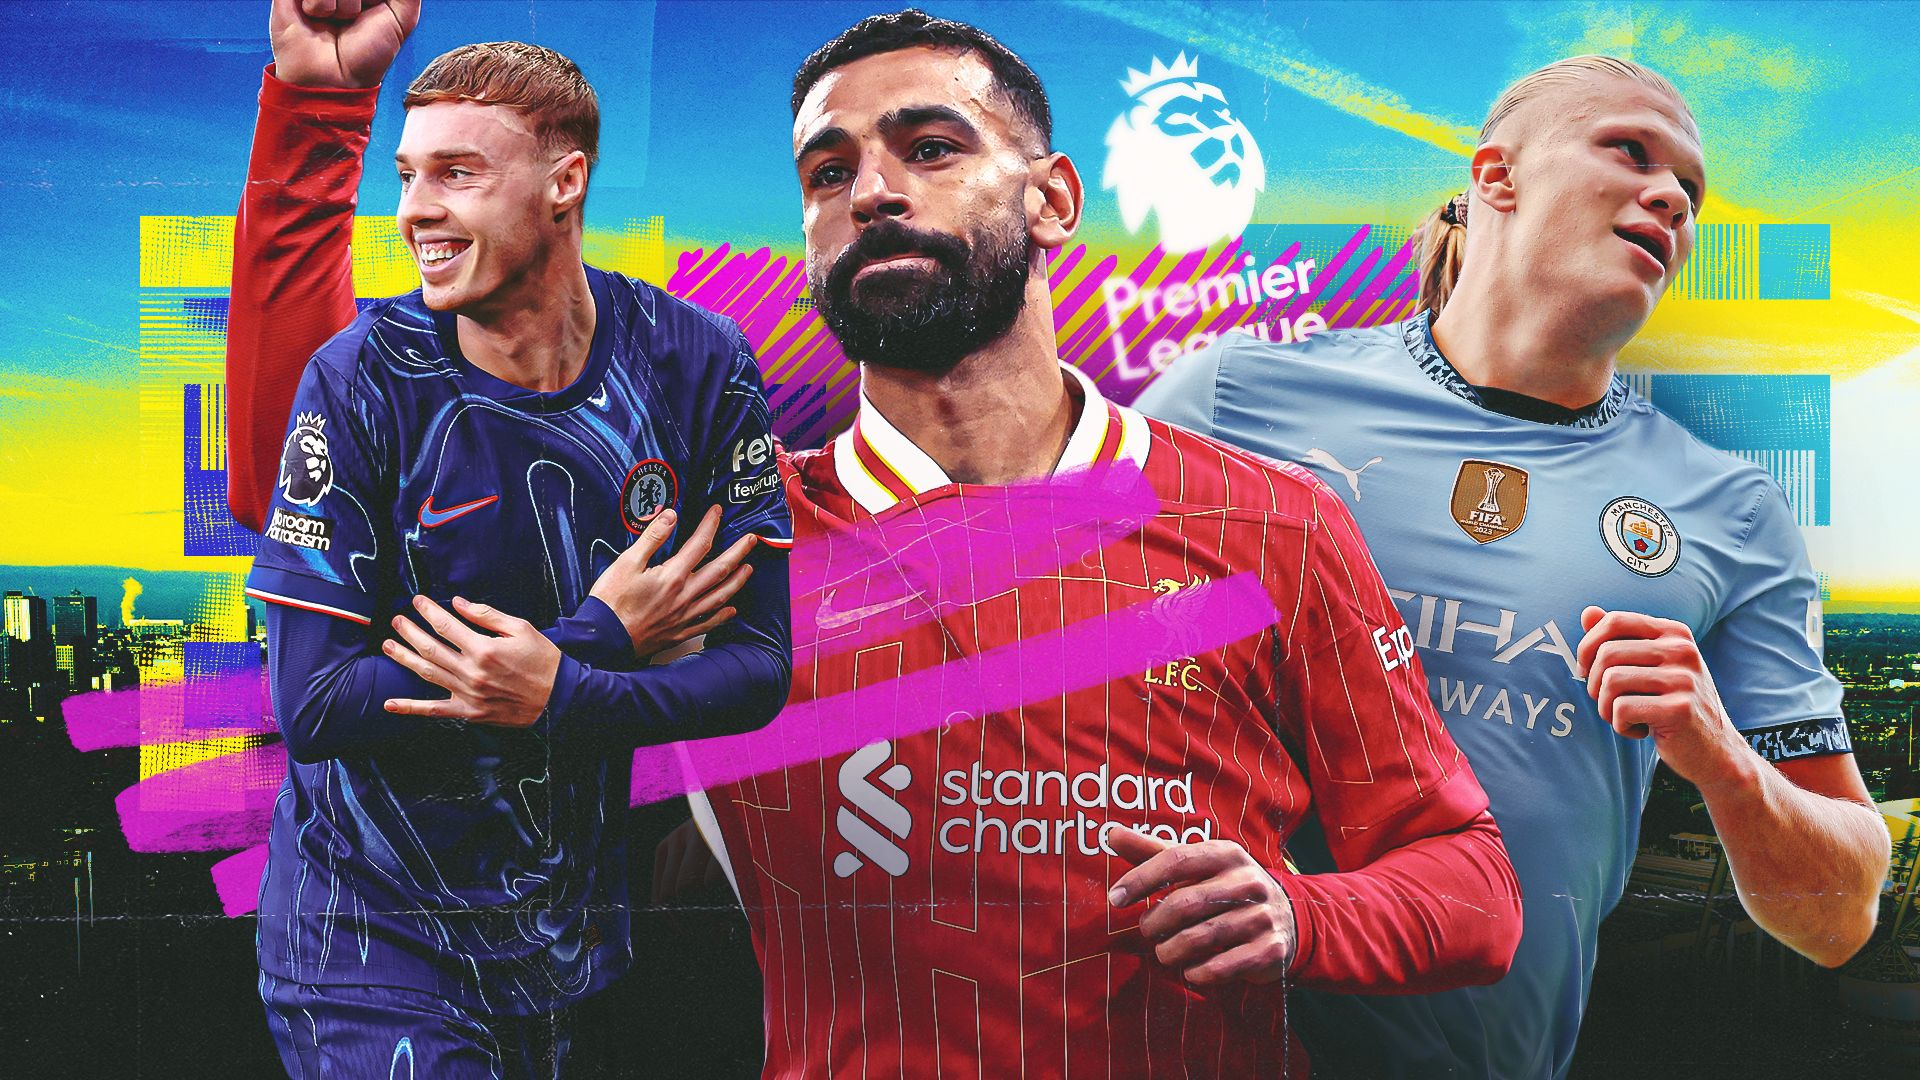

---------
##**`CONTENTS`**

### **1. Introduction**
### **2. Dataset Overview**
### **3. Data Loading and Exploration**
### **4. Data Cleaning & Preparation**
### **5. Exploratory Data Analysis (EDA)**
### **6. Basic Feature Engineering**
### **7. Basic Predictive Modeling**

### **8. Key Insights and Observations**
--------

## **1. INTRODUCTION**

**Football Match Outcome Analyzer** is a data-driven decision support system designed to uncover patterns, trends, and insights from football match data. Leveraging the power of Exploratory Data Analysis (EDA), feature engineering, and classification modeling, this project aims to:

* Understand match trends, team performances, and game statistics

* Analyze patterns in home vs. away team outcomes

* Identify key features that influence match results

* Build a logistic regression model to predict the match result (win/draw/loss for home team)

This project focuses on practical football analytics and aims to support enthusiasts, analysts, and fantasy league players in gaining deeper insight into match dynamics.

## **2. DATASET OVERVIEW**

* This project uses a CSV file named `matches.csv` which contains detailed historical match-level data for football league

* For this analysis, focus will be primarily on matches from 2020-2024, particularly from the English Premier League (EPL).

The dataset includes:

* **Match Information**: Season, date, league, and venue

* **Teams**: Home and away team names

* **Goals Scored**: Home and away goals

* **Match Result**: Outcome for the home team (Win/Draw/Loss)



##Features Description

**date** : the date of the game

**time** : the time of the game

**comp** : the competition of the game

**round** : the round of the game

**day** : the day of the week of the game

**venue** : the venue of the game

**result** : the result of the game

**gf** : the goals for the home team

**ga** : the goals for the away team

**opponent**: the opponent of the home team

**xg** : the expected goals for the home team

**xga** : the expected goals for the away team

**poss** : the possession of the home team

**captain** : the captain of the home team

**formation** : the formation of the home team

**referee** : the referee of the game

**sh** : the shots of the home team

**sot** : the shots on target of the home team

**dist** : the average distance of the shots of the home team

**fk** : the free kicks of the home team

**pk** : the penalty kicks of the home team

**pka** : the penalty kicks attempted of the home team

**season** : the season year of the match

**team**: the home team

## **3. DATA LOADING AND EXPLORATION**

Loading the EPL match dataset and inspecting the first few rows, columns, and datatypes

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('matches.csv')

In [ ]:
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2021,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2021,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2021,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2021,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2021,Manchester City


In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
time,0
comp,0
round,0
day,0
venue,0
result,0
gf,0
ga,0


## **4. DATA CLEANING AND PREPARATION**

* **Column Removal**: Dropped irrelevant or unreliable columns that either had incorrect data, were redundant, or lacked analytical value.

In [ ]:
df.drop(['Unnamed: 0', 'comp', 'match report', 'notes'], axis=1, inplace = True)

In [ ]:
df.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,2020-09-21,20:15 (21:15),Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,4-2-3-1,Andre Marriner,13,8,21.1,2,1,1,2021,Manchester City
1,2020-09-27,16:30 (17:30),Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,4-2-3-1,Michael Oliver,16,5,19.8,1,0,0,2021,Manchester City
2,2020-10-03,17:30 (18:30),Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,4-3-3,Mike Dean,23,1,18.2,1,0,0,2021,Manchester City
3,2020-10-17,17:30 (18:30),Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,3-1-4-2,Chris Kavanagh,13,5,17.7,0,0,0,2021,Manchester City
4,2020-10-24,12:30 (13:30),Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,4-3-3,Anthony Taylor,14,7,20.9,1,0,0,2021,Manchester City


*  **Duplicate Removal**: Checked and removed any duplicate match records to avoid biased statistics.

In [ ]:
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'duplicated values: {df.duplicated().sum()}')

Missing values: 1635
duplicated values: 988


In [ ]:
# View duplicate rows
duplicates = df[df.duplicated(keep=False)]
duplicates.sort_values(by=['team', 'date'])

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
266,2020-09-12,12:30 (13:30),Matchweek 1,Sat,Away,W,3,0,Fulham,1.9,...,3-4-3,Chris Kavanagh,13,5,14.1,2,0,0,2021,Arsenal
3534,2020-09-12,12:30 (13:30),Matchweek 1,Sat,Away,W,3,0,Fulham,1.9,...,3-4-3,Chris Kavanagh,13,5,14.1,2,0,0,2021,Arsenal
267,2020-09-19,20:00 (21:00),Matchweek 2,Sat,Home,W,2,1,West Ham,1.1,...,3-4-3,Michael Oliver,7,3,14.8,0,0,0,2021,Arsenal
3535,2020-09-19,20:00 (21:00),Matchweek 2,Sat,Home,W,2,1,West Ham,1.1,...,3-4-3,Michael Oliver,7,3,14.8,0,0,0,2021,Arsenal
268,2020-09-28,20:00 (21:00),Matchweek 3,Mon,Away,L,1,3,Liverpool,1.3,...,3-4-3,Craig Pawson,4,3,15.0,0,0,0,2021,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,2021-05-16,14:05 (15:05),Matchweek 36,Sun,Away,L,0,2,Tottenham,0.9,...,4-2-3-1,Martin Atkinson,15,3,17.6,0,0,0,2021,Wolverhampton Wanderers
492,2021-05-19,18:00 (19:00),Matchweek 37,Wed,Away,L,0,1,Everton,0.3,...,3-4-1-2,Andy Madley,9,3,21.5,0,0,0,2021,Wolverhampton Wanderers
3760,2021-05-19,18:00 (19:00),Matchweek 37,Wed,Away,L,0,1,Everton,0.3,...,3-4-1-2,Andy Madley,9,3,21.5,0,0,0,2021,Wolverhampton Wanderers
493,2021-05-23,16:00 (17:00),Matchweek 38,Sun,Home,L,1,2,Manchester Utd,0.9,...,3-5-2,Mike Dean,14,4,18.0,0,0,0,2021,Wolverhampton Wanderers


In [ ]:
# Drop exact duplicate rows (keeps the first occurrence)
df = df.drop_duplicates()
df

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,2020-09-21,20:15 (21:15),Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,4-2-3-1,Andre Marriner,13,8,21.1,2,1,1,2021,Manchester City
1,2020-09-27,16:30 (17:30),Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,4-2-3-1,Michael Oliver,16,5,19.8,1,0,0,2021,Manchester City
2,2020-10-03,17:30 (18:30),Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,4-3-3,Mike Dean,23,1,18.2,1,0,0,2021,Manchester City
3,2020-10-17,17:30 (18:30),Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,3-1-4-2,Chris Kavanagh,13,5,17.7,0,0,0,2021,Manchester City
4,2020-10-24,12:30 (13:30),Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,4-3-3,Anthony Taylor,14,7,20.9,1,0,0,2021,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,18:00 (19:00),Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,4-2-3-1,Anthony Taylor,12,3,16.9,1,0,0,2020,Norwich City
4784,2020-07-11,12:30 (13:30),Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,4-2-3-1,Kevin Friend,11,2,19.8,1,0,0,2020,Norwich City
4785,2020-07-14,20:15 (21:15),Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,4-1-4-1,Jonathan Moss,2,0,20.6,0,0,0,2020,Norwich City
4786,2020-07-18,17:30 (18:30),Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,4-2-3-1,Kevin Friend,6,2,13.4,0,0,0,2020,Norwich City


* **Mapping numeric values to relevant columns( like `result`)**

In [ ]:
df['result'].value_counts()

,count
result,
W,1468
L,1468
D,864


In [ ]:
results = {'W': 3, 'D': 1, 'L': 0} # Win = 3 points, Draw = 1 point, Loss = 0 point
df['result'] = df['result'].map(results)

In [ ]:
df['result']

,result
0,3
1,0
2,1
3,3
4,1
...,...
4783,0
4784,0
4785,0
4786,0


* **Handling Outliers or missing values**

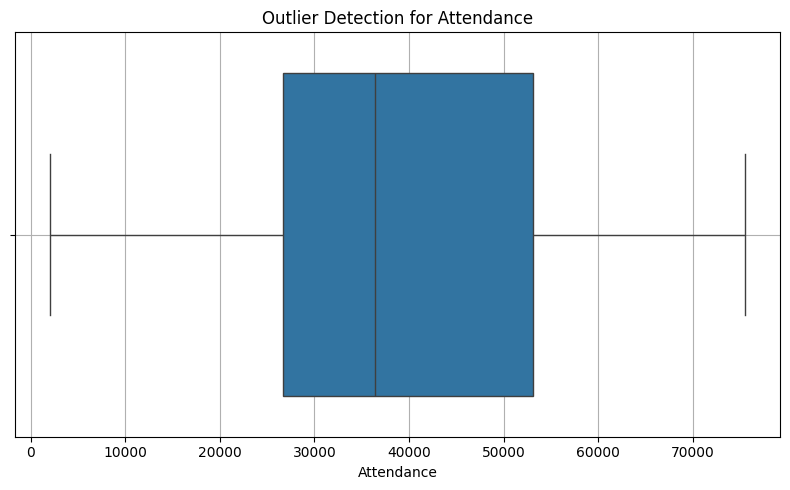

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=df['attendance'])

plt.title('Outlier Detection for Attendance')
plt.xlabel('Attendance')

plt.grid(True)
plt.tight_layout()
plt.show()

NOTE: From the boxplot of `attendence` it's clear that there are no outliers so there is no need to remove outliers

In [ ]:
df['dist'] = df['dist'].fillna(df['dist'].median())

In [ ]:
df.isnull().sum()

,0
date,0
time,0
round,0
day,0
venue,0
result,0
gf,0
ga,0
opponent,0
xg,0


In [ ]:
df['formation'].value_counts()

,count
formation,
4-2-3-1,1108
4-3-3,821
4-4-2,455
3-4-3,436
3-5-2,225
4-1-4-1,184
4-4-1-1,116
5-3-2,82
5-4-1,78


In [ ]:
# Remove "◆" from rows of "formation":
df['formation'] = df['formation'].str.replace('◆', '', regex=False)

In [ ]:
# split 'YYYY-MM-DD' from "date":
l= df['date'].str.split('-') # Split date string into a list [year, month, day]
df['year']=  [x[0] for x in l]
df['month']= [x[1] for x in l]
df['date_day']=   [x[2] for x in l]
df.drop(columns=['date'], inplace=True, axis=1)

# Reorder columns to organize:
new_order = ['year', 'month', 'date_day', 'day', 'time', 'season', 'round', 'venue', 'team', 'opponent',
             'gf', 'ga', 'result', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk',
             'pkatt', 'attendance', 'captain', 'formation', 'referee']
df = df[new_order]

In [ ]:
df

,year,month,date_day,day,time,season,round,venue,team,opponent,...,sh,sot,dist,fk,pk,pkatt,attendance,captain,formation,referee
0,2020,09,21,Mon,20:15 (21:15),2021,Matchweek 2,Away,Manchester City,Wolves,...,13,8,21.1,2,1,1,NaN,Fernandinho,4-2-3-1,Andre Marriner
1,2020,09,27,Sun,16:30 (17:30),2021,Matchweek 3,Home,Manchester City,Leicester City,...,16,5,19.8,1,0,0,NaN,Fernandinho,4-2-3-1,Michael Oliver
2,2020,10,03,Sat,17:30 (18:30),2021,Matchweek 4,Away,Manchester City,Leeds United,...,23,1,18.2,1,0,0,NaN,Kevin De Bruyne,4-3-3,Mike Dean
3,2020,10,17,Sat,17:30 (18:30),2021,Matchweek 5,Home,Manchester City,Arsenal,...,13,5,17.7,0,0,0,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh
4,2020,10,24,Sat,12:30 (13:30),2021,Matchweek 6,Away,Manchester City,West Ham,...,14,7,20.9,1,0,0,NaN,Raheem Sterling,4-3-3,Anthony Taylor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020,07,07,Tue,18:00 (19:00),2020,Matchweek 34,Away,Norwich City,Watford,...,12,3,16.9,1,0,0,NaN,Alexander Tettey,4-2-3-1,Anthony Taylor
4784,2020,07,11,Sat,12:30 (13:30),2020,Matchweek 35,Home,Norwich City,West Ham,...,11,2,19.8,1,0,0,NaN,Alexander Tettey,4-2-3-1,Kevin Friend
4785,2020,07,14,Tue,20:15 (21:15),2020,Matchweek 36,Away,Norwich City,Chelsea,...,2,0,20.6,0,0,0,NaN,Alexander Tettey,4-1-4-1,Jonathan Moss
4786,2020,07,18,Sat,17:30 (18:30),2020,Matchweek 37,Home,Norwich City,Burnley,...,6,2,13.4,0,0,0,NaN,Alexander Tettey,4-2-3-1,Kevin Friend


## **5. EDA (Exploratory Data Analysis)**



##I. Date and Time Analysis

**I. Year-wise Match Distribution**

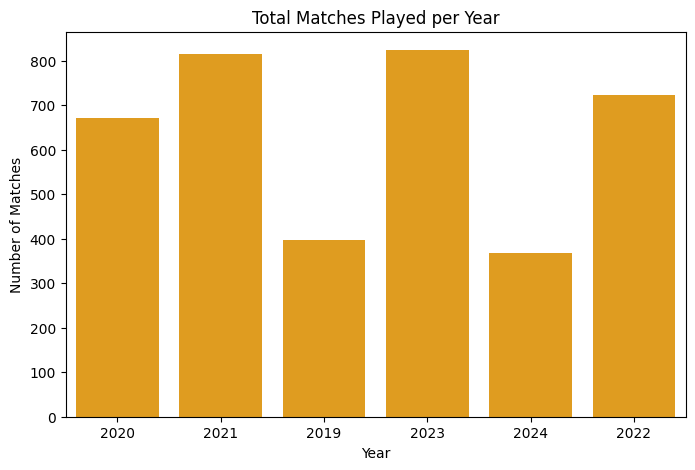

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='year', data=df, color='orange')

plt.title("Total Matches Played per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")

plt.show()

In [ ]:
match_counts_per_year = df['year'].value_counts().sort_index()

print("Matches played per year:")
print(match_counts_per_year)

Matches played per year:
year
2019    398
2020    672
2021    816
2022    722
2023    824
2024    368
Name: count, dtype: int64


* 2021 and 2023 is the year in which the most games were played.

**II. Number of matches played per month**

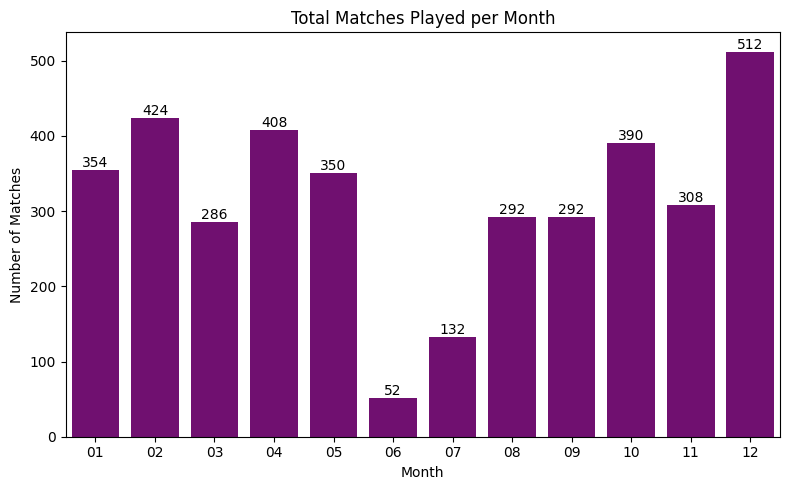

In [ ]:
# Count of matches per month
month_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

# Bar plot
sns.barplot(x=month_counts.index, y=month_counts.values, color='purple')

# Titles and labels
plt.title("Total Matches Played per Month")
plt.xlabel("Month")
plt.ylabel("Number of Matches")

# Add counts on top of each bar
for i, count in enumerate(month_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

* The two months in which the most games were played were 'December' and 'February'.
* It is clear that the number of matches decreases in the middle of the season, i.e. in the month of 'October'.

**III. Kickoff Time Distribution**


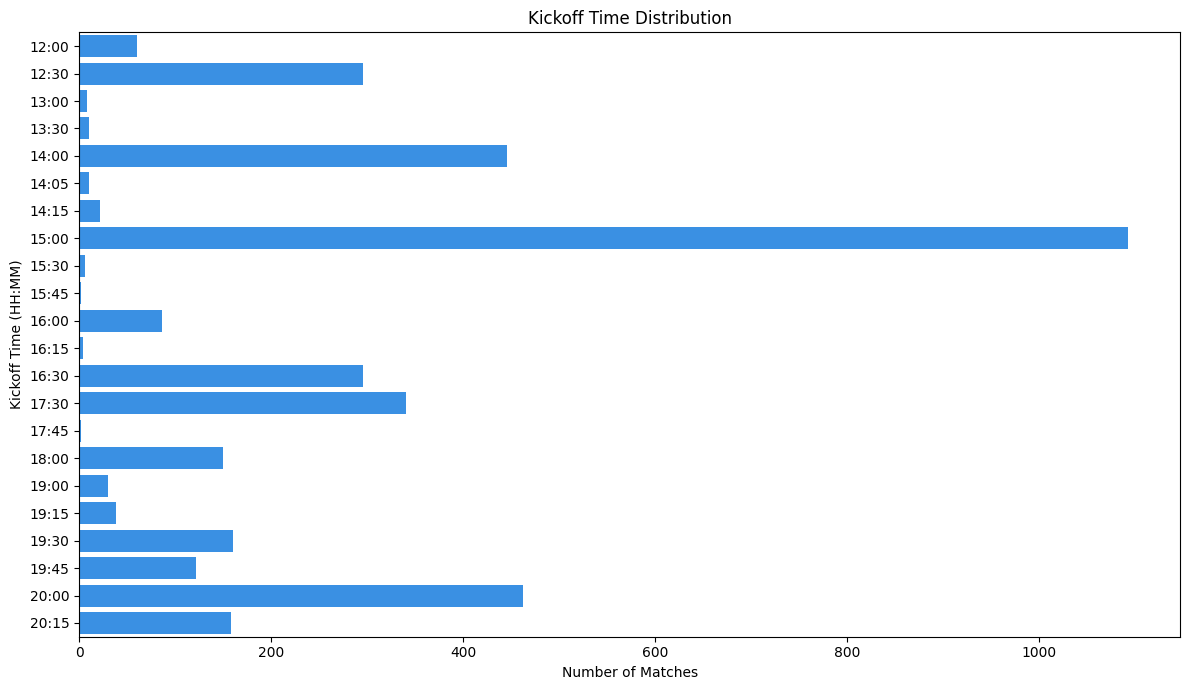

In [ ]:
# Extract first kickoff time (e.g., "20:15" from "20:15 (21:15)")
df.loc[:, 'kickoff_time'] = df.loc[:,'time'].str.split().str[0]

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='kickoff_time', color='dodgerblue', order=sorted(df['kickoff_time'].unique()))

plt.title('Kickoff Time Distribution')
plt.ylabel('Kickoff Time (HH:MM)')
plt.xlabel('Number of Matches')

plt.tight_layout()
plt.show()

* The distribution of kickoff times indicates that the majority of matches started around 15:00 (3:00 PM), i.e Afternoon.

##II. Attendance Analysis

**I. Atendance per Season**

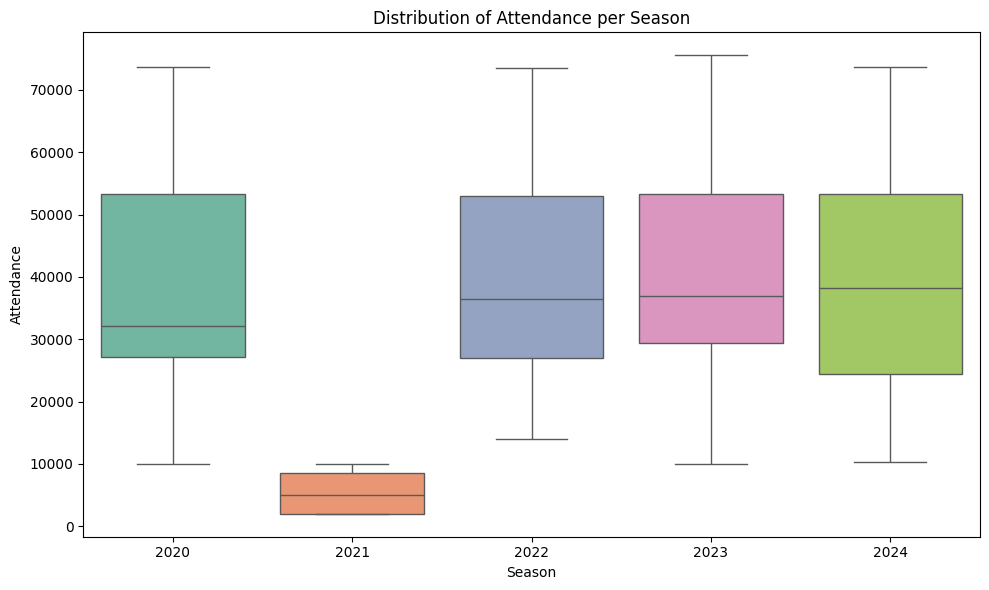

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='attendance', data=df, hue='season',palette='Set2', legend=False)

plt.title('Distribution of Attendance per Season')
plt.xlabel('Season')
plt.ylabel('Attendance')

plt.tight_layout()
plt.show()

* Season 2021 shows a sharp drop in attendance, likely due to COVID-19 restrictions.

* Other seasons (2020, 2022–2024) show higher and more varied attendance.

* Median attendance for these seasons is around 30,000–40,000.

* Maximum attendance reaches above 70,000, indicating full stadiums.

* The variation reflects differences in club popularity and stadium capacities.

* Overall, it highlights the return of fans post-pandemic starting from the 2022 season.

**I. Attendance per Home Team Matches**

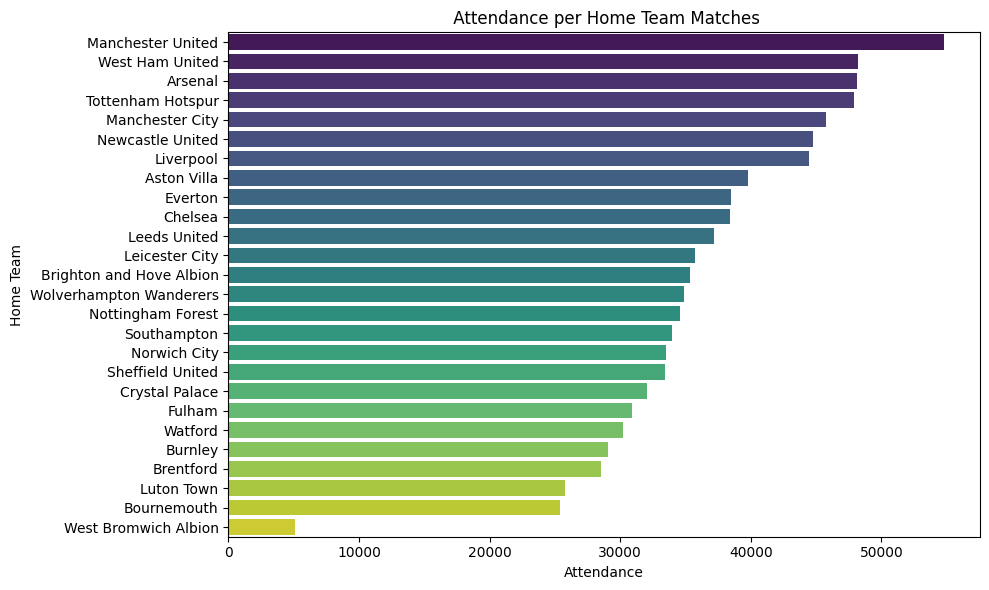

In [ ]:
# Group by home team and get average or total attendance
home_attendance = df.groupby('team')['attendance'].mean().sort_values(ascending=False).reset_index()

#Barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=home_attendance,
    y='team',
    x='attendance',
    hue='team',
    legend=False,
    palette='viridis'
)

plt.title(' Attendance per Home Team Matches')
plt.xlabel('Attendance')
plt.ylabel('Home Team')
plt.tight_layout()
plt.show()

In [ ]:
home_attendance = df.groupby('team')['attendance'].mean().sort_values(ascending=False).reset_index()

print("Mean Attendance per Home Team:")
print(home_attendance)

Mean Attendance per Home Team:
                        team    attendance
0          Manchester United  54801.452055
1            West Ham United  48204.013699
2                    Arsenal  48136.445205
3          Tottenham Hotspur  47886.810811
4            Manchester City  45783.215278
5           Newcastle United  44767.703448
6                  Liverpool  44483.268456
7                Aston Villa  39783.622378
8                    Everton  38488.280822
9                    Chelsea  38415.122449
10              Leeds United  37158.848101
11            Leicester City  35692.242991
12  Brighton and Hove Albion  35325.103448
13   Wolverhampton Wanderers  34910.815068
14         Nottingham Forest  34548.184211
15               Southampton  33973.532110
16              Norwich City  33492.283582
17          Sheffield United  33462.550725
18            Crystal Palace  32035.527397
19                    Fulham  30920.582278
20                   Watford  30231.716418
21                   Bu

* Manchester United leads in average home attendance, crossing 50,000, reflecting their large fanbase and Old Trafford's high capacity.

* West Ham, Arsenal, Tottenham, and Manchester City also show strong attendance figures, all above 40,000.

* Traditional top clubs like Liverpool, Chelsea, and Newcastle maintain consistently high home crowds.

* Lower attendance is seen for teams like Luton Town, Bournemouth, and West Brom, primarily due to smaller stadium capacities rather than lack of support.

* The chart highlights how stadium size and club popularity both influence home match attendance.

In [ ]:
df.head()

,year,month,date_day,day,time,season,round,venue,team,opponent,...,sot,dist,fk,pk,pkatt,attendance,captain,formation,referee,kickoff_time
0,2020,09,21,Mon,20:15 (21:15),2021,Matchweek 2,Away,Manchester City,Wolves,...,8,21.1,2,1,1,NaN,Fernandinho,4-2-3-1,Andre Marriner,20:15
1,2020,09,27,Sun,16:30 (17:30),2021,Matchweek 3,Home,Manchester City,Leicester City,...,5,19.8,1,0,0,NaN,Fernandinho,4-2-3-1,Michael Oliver,16:30
2,2020,10,03,Sat,17:30 (18:30),2021,Matchweek 4,Away,Manchester City,Leeds United,...,1,18.2,1,0,0,NaN,Kevin De Bruyne,4-3-3,Mike Dean,17:30
3,2020,10,17,Sat,17:30 (18:30),2021,Matchweek 5,Home,Manchester City,Arsenal,...,5,17.7,0,0,0,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,17:30
4,2020,10,24,Sat,12:30 (13:30),2021,Matchweek 6,Away,Manchester City,West Ham,...,7,20.9,1,0,0,NaN,Raheem Sterling,4-3-3,Anthony Taylor,12:30


##III. Players and Referee

**I. Name of Referee officiating the Matches**

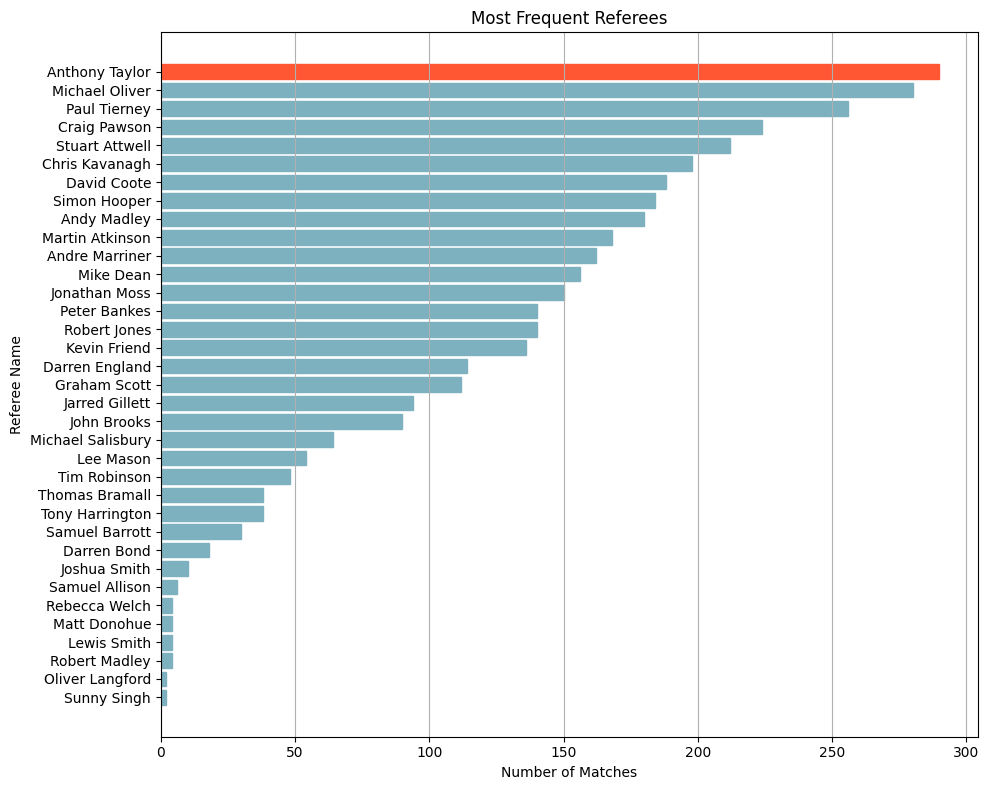

In [ ]:
ref_counts = df['referee'].value_counts().sort_values(ascending=True)

# Identify the index of the most frequent referee
max_index = ref_counts.values.argmax()

# Color: highlight most frequent referee
colors = ['#FF5733' if i == max_index else '#7DB1BF' for i in range(len(ref_counts))]

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(ref_counts.index, ref_counts.values, color=colors, edgecolor=colors)
plt.title('Most Frequent Referees')
plt.xlabel('Number of Matches')
plt.ylabel('Referee Name')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

* **Anthony Taylor** has officiated the highest number of matches, making him the most frequently appointed referee in the dataset.

* **Michael Oliver** follows as the second most frequently assigned referee.

**II. Most Wins Under a Captain**

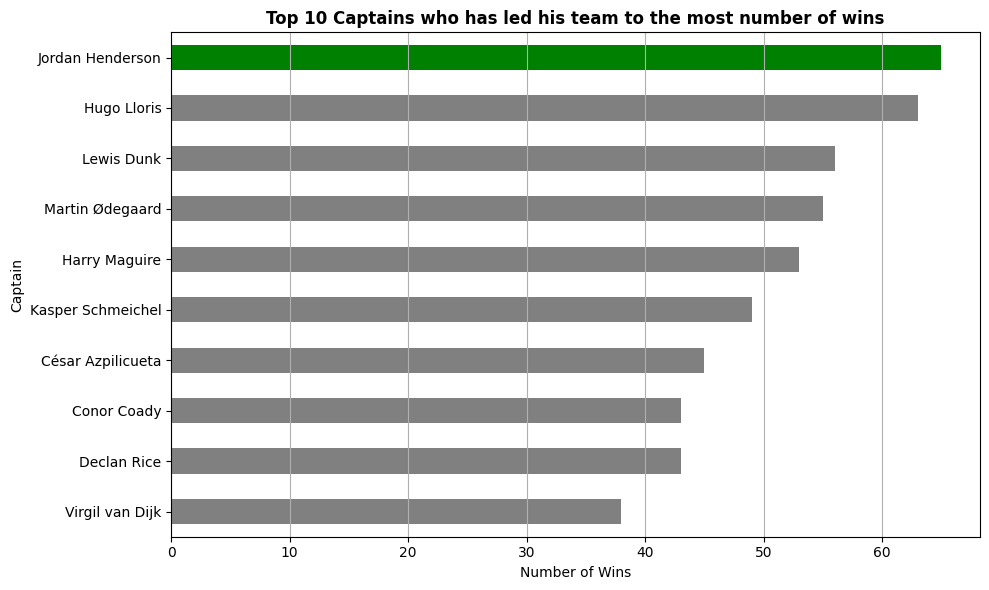

In [ ]:
# Filter only won matches
df_wins = df[df['result'] == 3]

# Count number of wins under each captain
captain_wins = df_wins.groupby('captain').size().sort_values(ascending=False).head(10)

# Highlight only the highest
colors = ['green' if i == captain_wins.max() else 'gray' for i in captain_wins]

# Plotting
plt.figure(figsize=(10, 6))
ax = captain_wins.plot(kind='barh', color=colors)
plt.title('Top 10 Captains who has led his team to the most number of wins',fontweight='bold')
plt.xlabel('Number of Wins')
plt.ylabel('Captain')
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**Jordan Henderson** has led his team to the most number of wins as captain,

with **Hugo Lloris** following as the second highest in total victories under captaincy.

##IV. Season Analysis

**I.  Season-wise Attendance Trend Per Team**

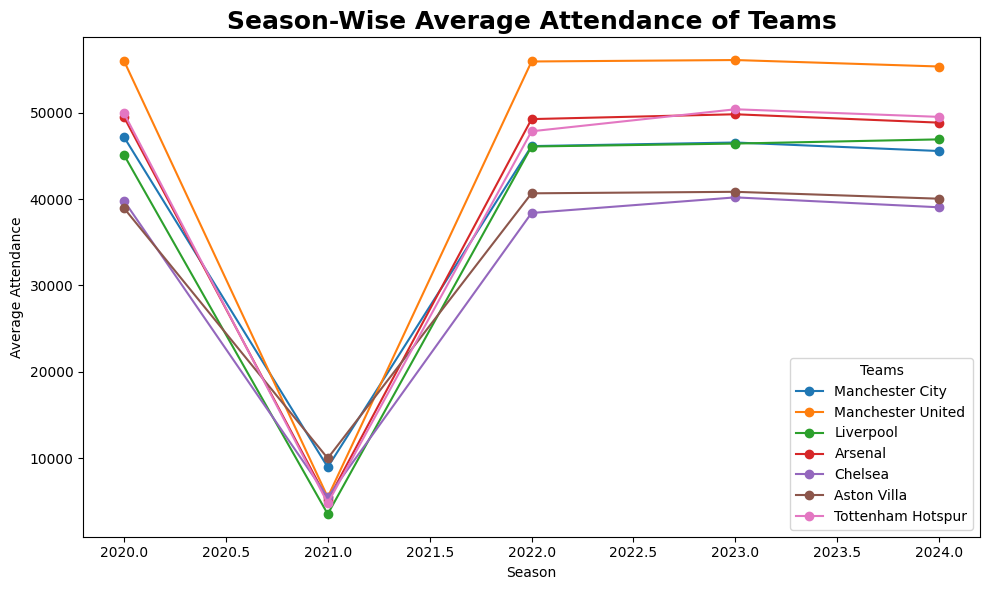

In [ ]:
teams = ['Manchester City', 'Manchester United', 'Liverpool', 'Arsenal', 'Chelsea', 'Aston Villa', 'Tottenham Hotspur']

plt.figure(figsize=(10, 6))
plt.title('Season-Wise Average Attendance of Teams', fontdict={'fontweight': 'bold', 'fontsize': 18})

# Plot each team's season-wise average attendance
for Team in teams:
    team_data = df[df['team'] == Team].groupby('season')['attendance'].mean()
    plt.plot(team_data.index, team_data.values, marker='o', label=Team)

plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.legend(title="Teams", loc='lower right')
plt.tight_layout()
plt.show()

**II. Season-wise Match Outcomes**

It shows:

* Total number of match outcomes from the perspective of the teams listed in the team column.

* It helps you understand how many wins/losses/draws occurred in general per season from all those teams' perspectives.

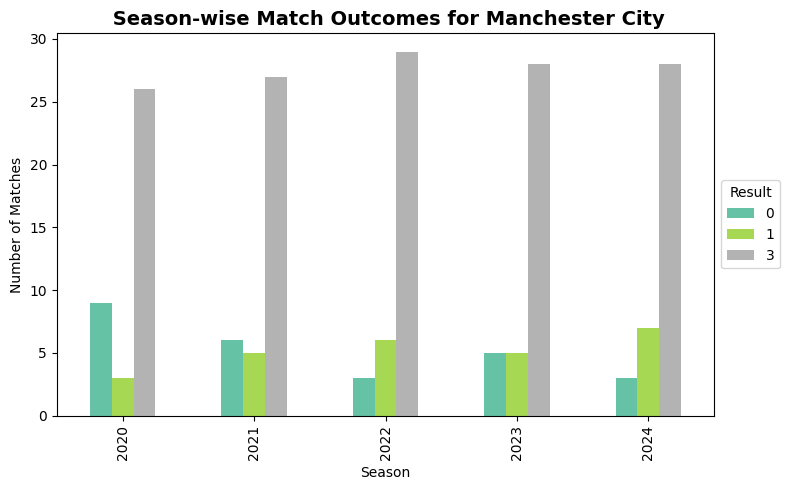

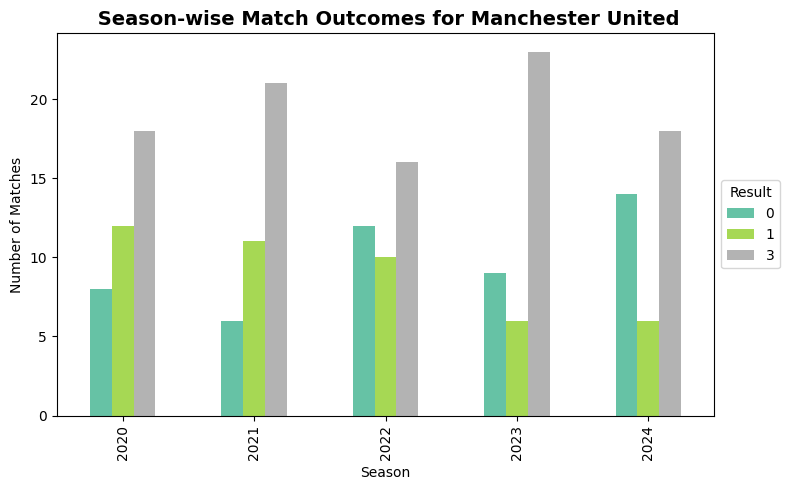

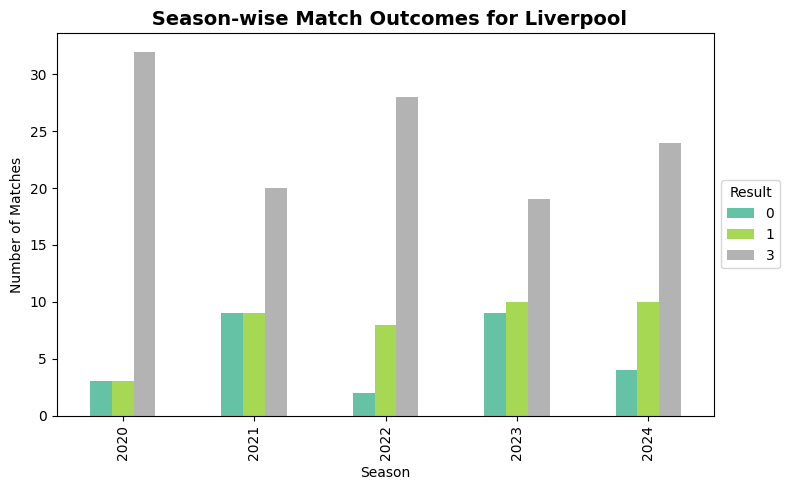

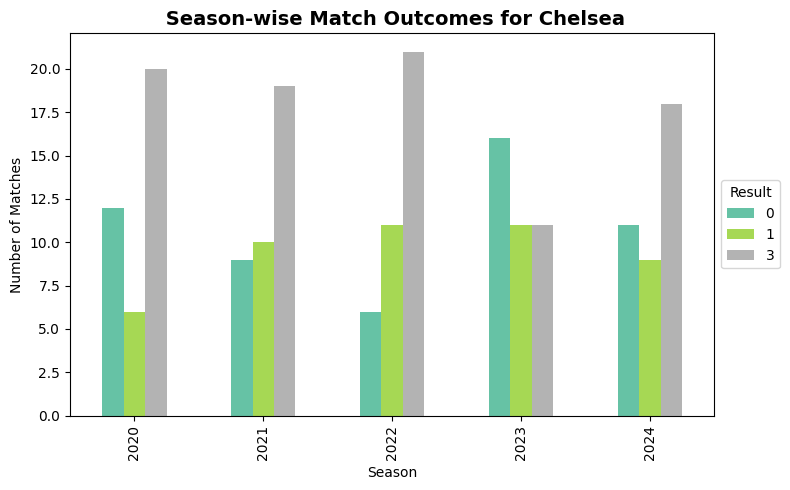

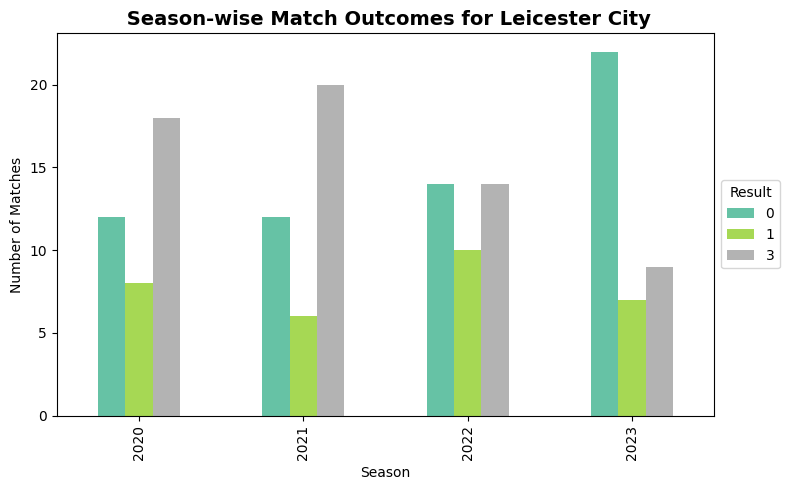

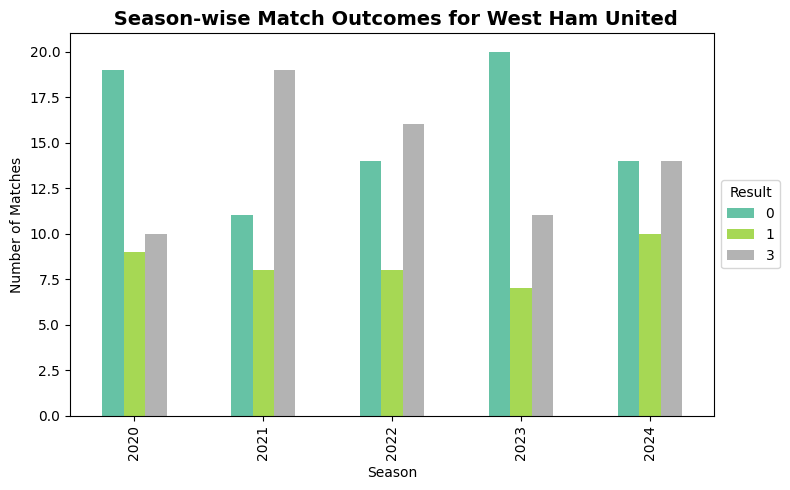

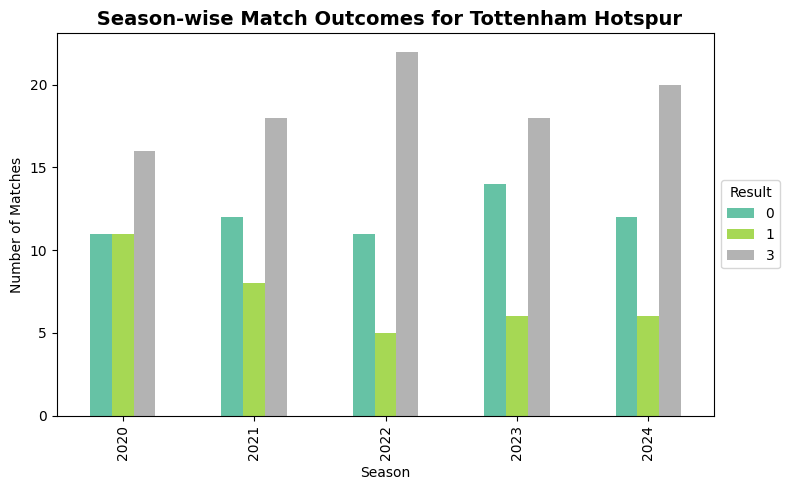

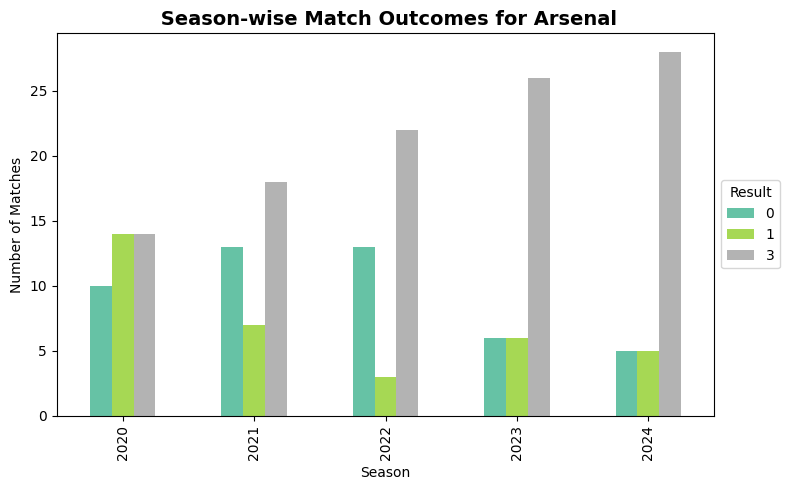

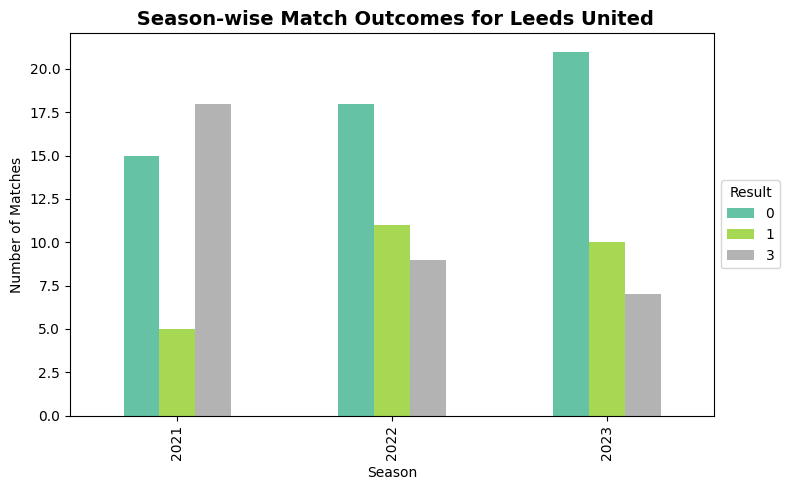

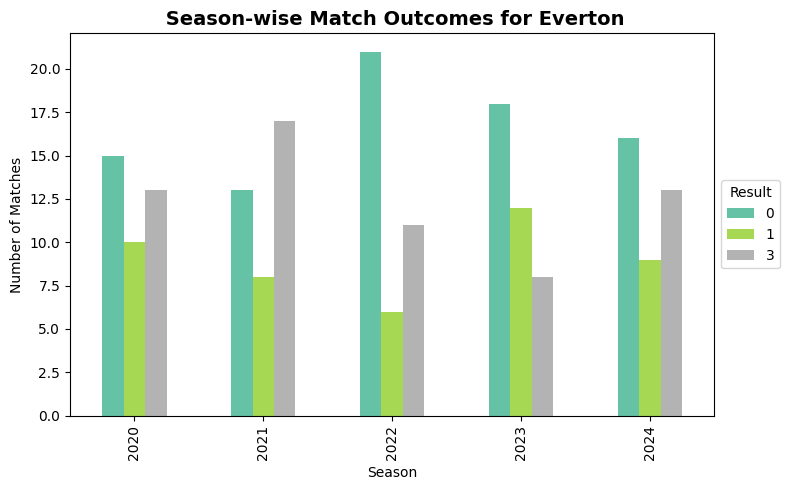

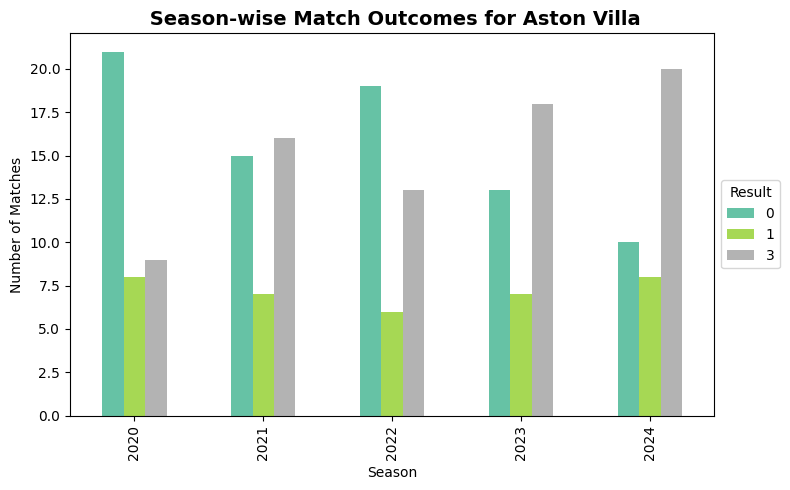

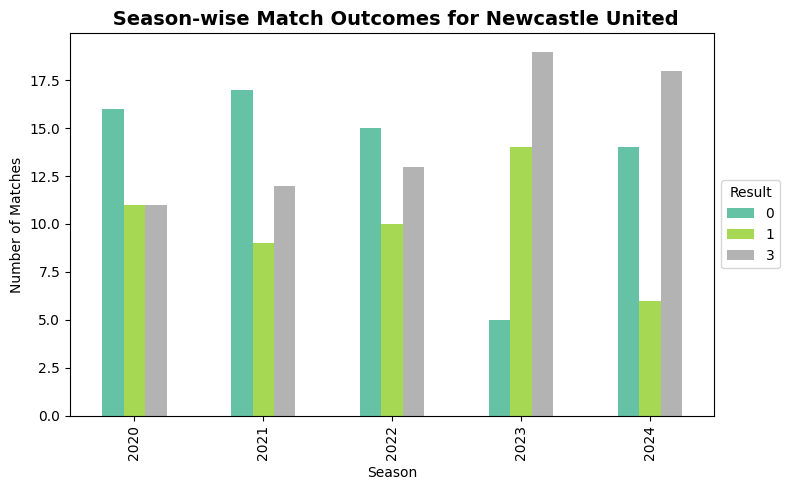

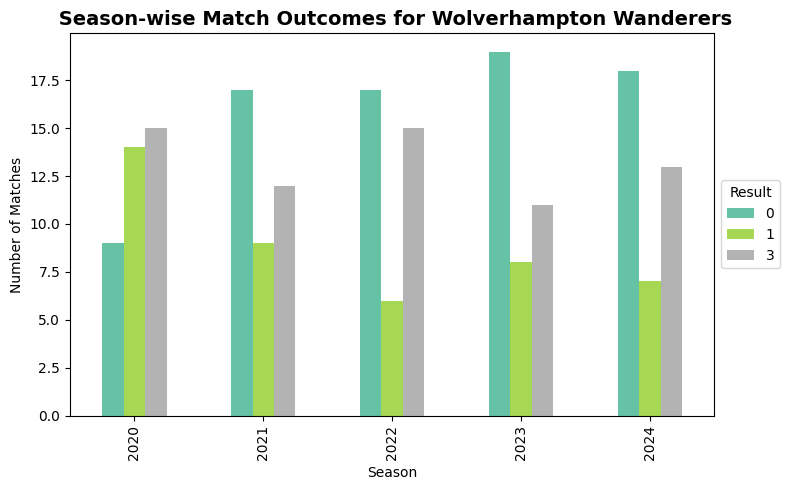

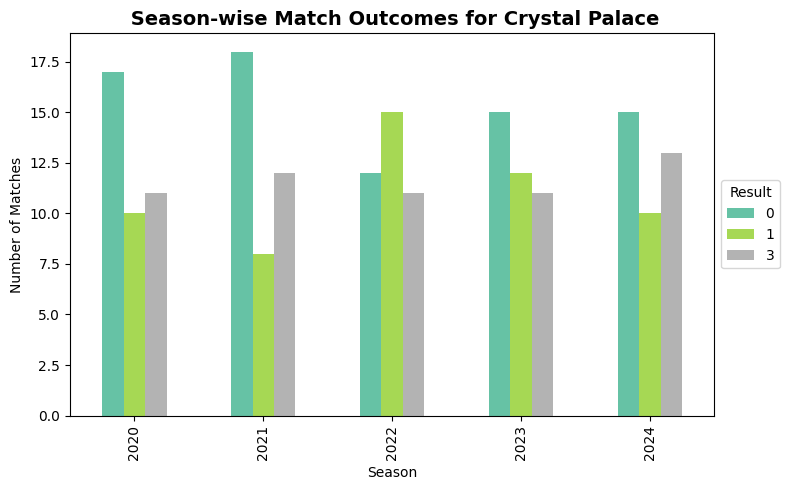

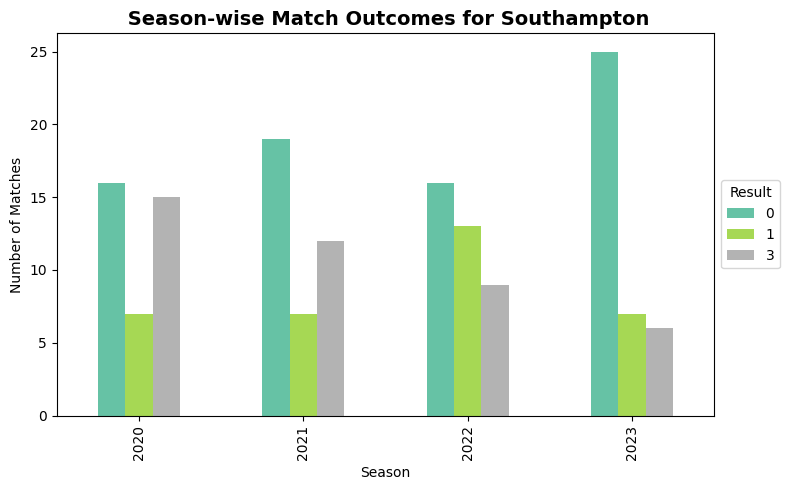

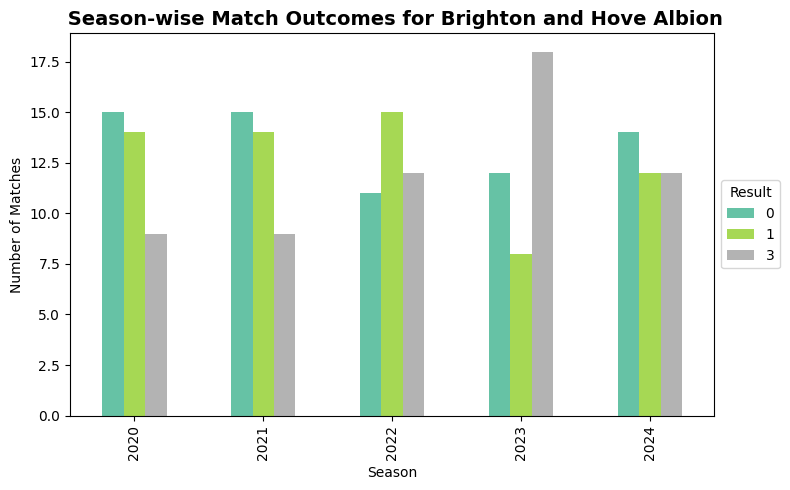

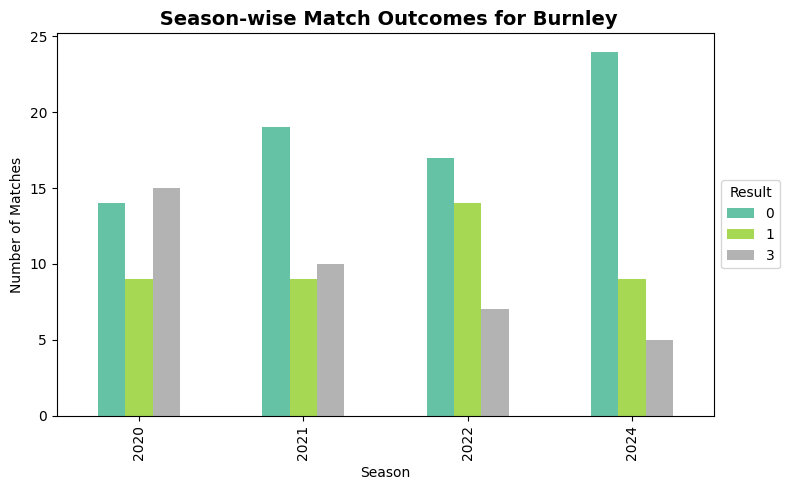

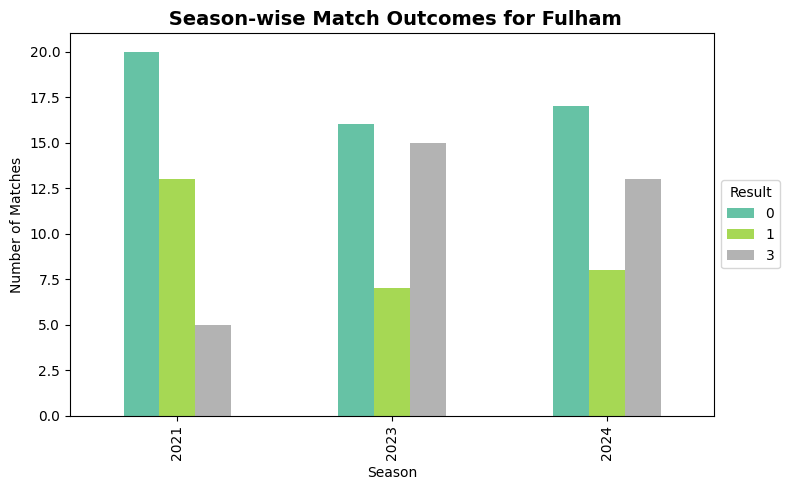

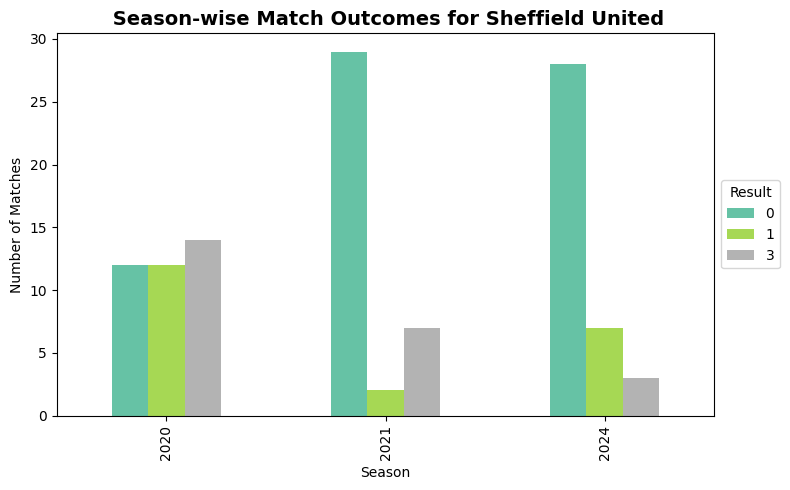

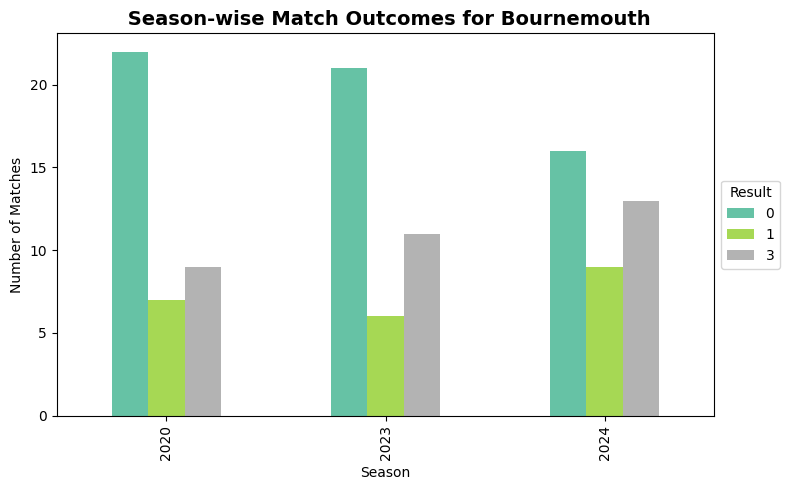

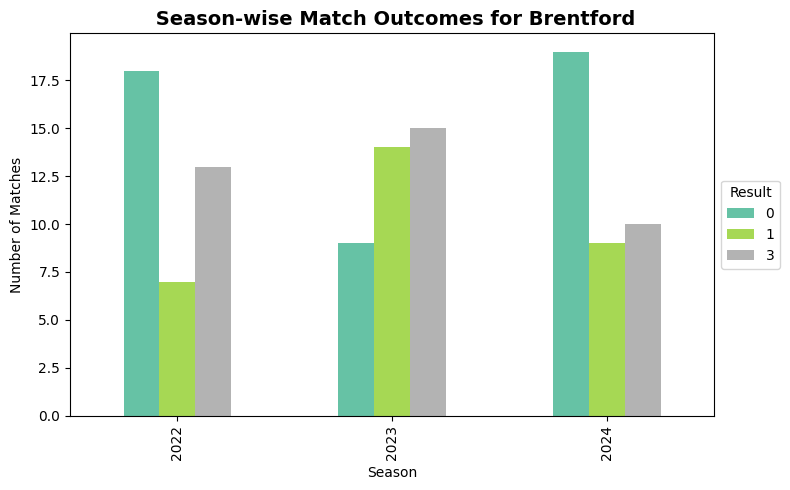

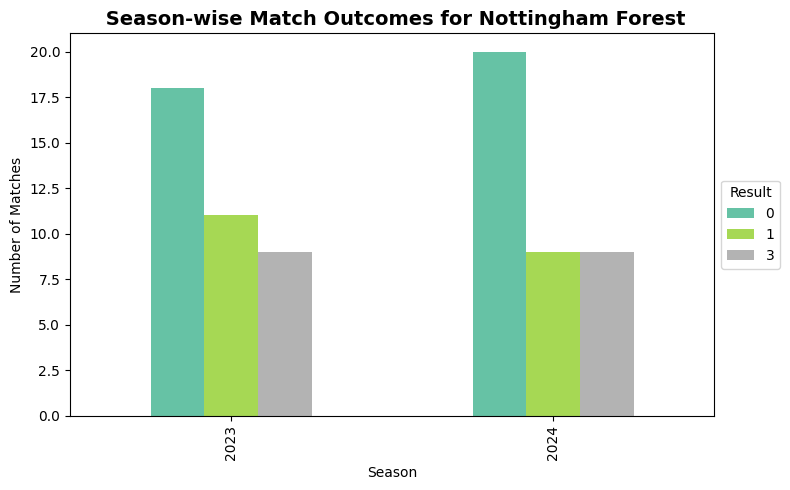

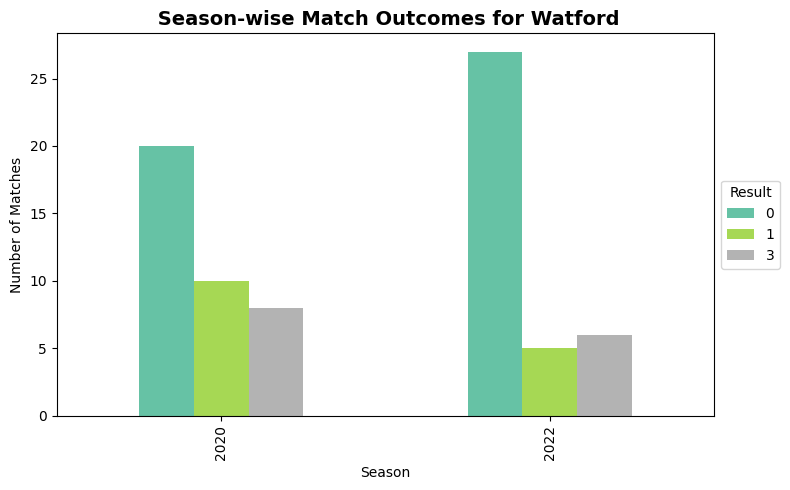

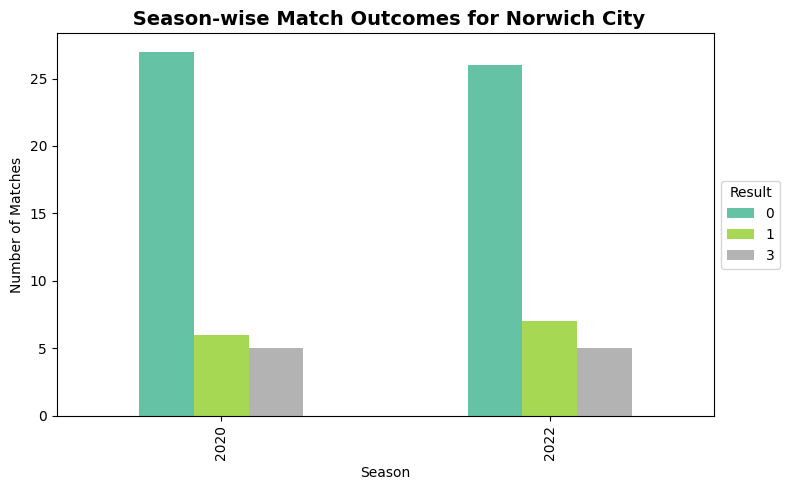

In [ ]:
teams = df['team'].unique()

for team in teams:
    team_df = df[df['team'] == team]
    match_outcomes = team_df.groupby(['season', 'result']).size().unstack().fillna(0)

    # Skip teams with very few data points
    if len(match_outcomes) < 2:
        continue

    match_outcomes.plot(kind='bar', colormap='Set2', figsize=(8, 5))

    plt.title(f' Season-wise Match Outcomes for {team}', fontsize=14, fontweight='bold')
    plt.xlabel('Season')
    plt.ylabel('Number of Matches')

    plt.legend(title='Result', loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()
    plt.show()

##V. Formation, Penalty and Free Kick Effectiveness
Penalty Conversion Rate: Ratio of penalty goals to penalties attempted.

Free Kick Impact: Relation between number of free kicks and other performance metrics like goals.Analysis



**I. The Formation used by Team in matches**

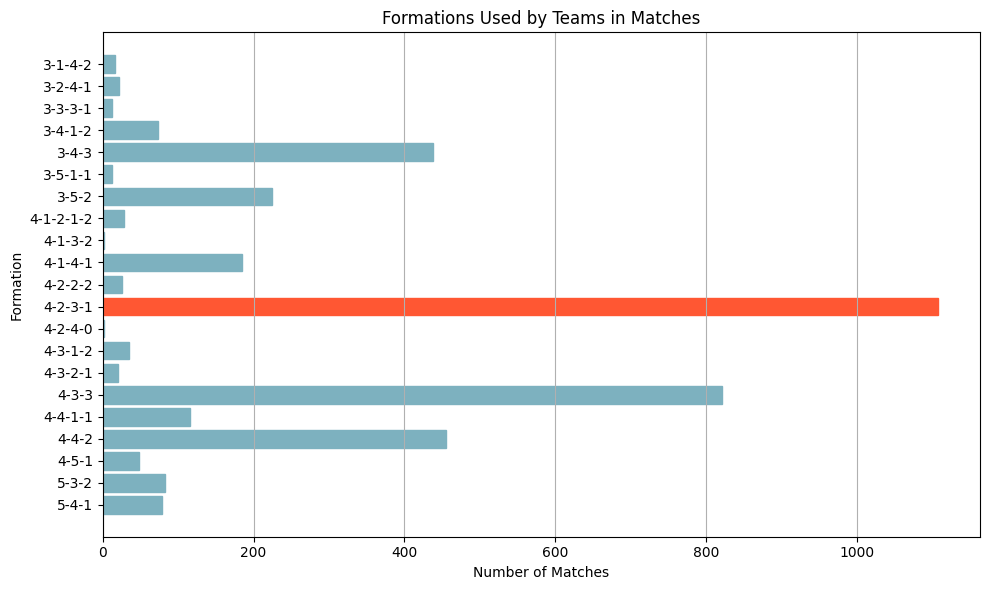

In [ ]:
form = df['formation'].value_counts().sort_index(ascending=False)

# Identify the index of the max value
max_index = form.values.argmax()

# Color: red for max, light blue for others
colors = ['#FF5733' if i == max_index else '#7DB1BF' for i in range(len(form))]

# horizontal bar
plt.figure(figsize=(10, 6))
plt.barh(form.index, form.values, color=colors, edgecolor=colors)
plt.title('Formations Used by Teams in Matches')
plt.xlabel('Number of Matches')
plt.ylabel('Formation')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**II. Formation Effectiveness – Win Rates for Each Formation**

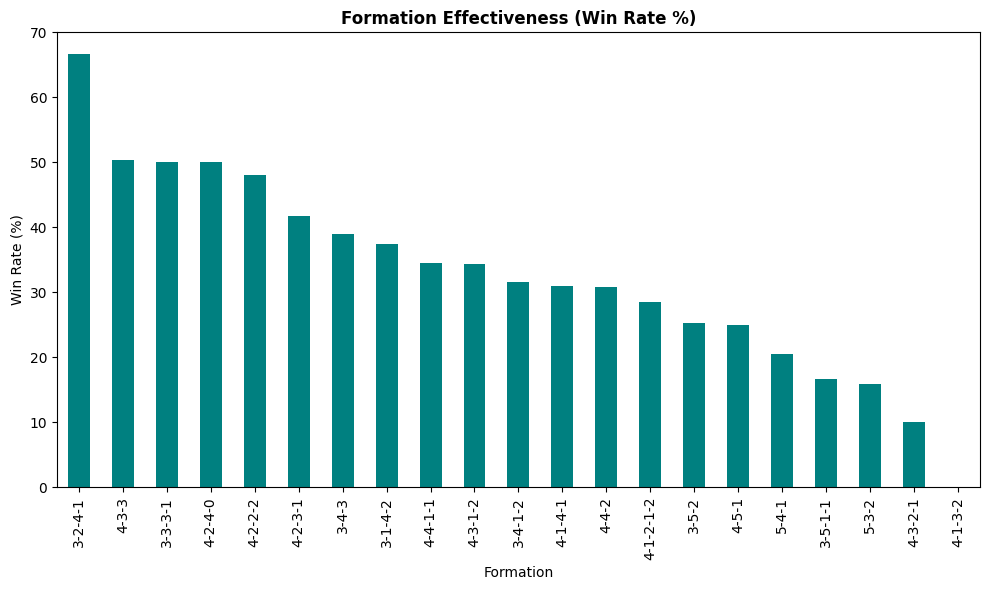

In [ ]:
# Filter only wins and total per formation
formation_stats = df.groupby(['formation'])['result'].value_counts().unstack().fillna(0)

# Calculate win rate: (Wins / Total matches with that formation)
formation_stats['WinRate'] = (formation_stats[3] / formation_stats.sum(axis=1)) * 100

#Bar Plot
plt.figure(figsize=(10, 6))
formation_stats['WinRate'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Formation Effectiveness (Win Rate %)", fontweight='bold')
plt.xlabel("Formation")
plt.ylabel("Win Rate (%)")
plt.tight_layout()
plt.show()

In [ ]:
df['team'].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

**III. Penalty Conversion Rate: Ratio of penalty goals to penalties attempted.**

Formula: `Penalty Conversion Rate = pk / pkatt`

* pk : the penalty kicks of the home team
* pkatt : the penalty kicks attempted of the home team

In [ ]:
df.columns

Index(['year', 'month', 'date_day', 'day', 'time', 'season', 'round', 'venue',
       'team', 'opponent', 'gf', 'ga', 'result', 'xg', 'xga', 'poss', 'sh',
       'sot', 'dist', 'fk', 'pk', 'pkatt', 'attendance', 'captain',
       'formation', 'referee', 'kickoff_time'],
      dtype='object')

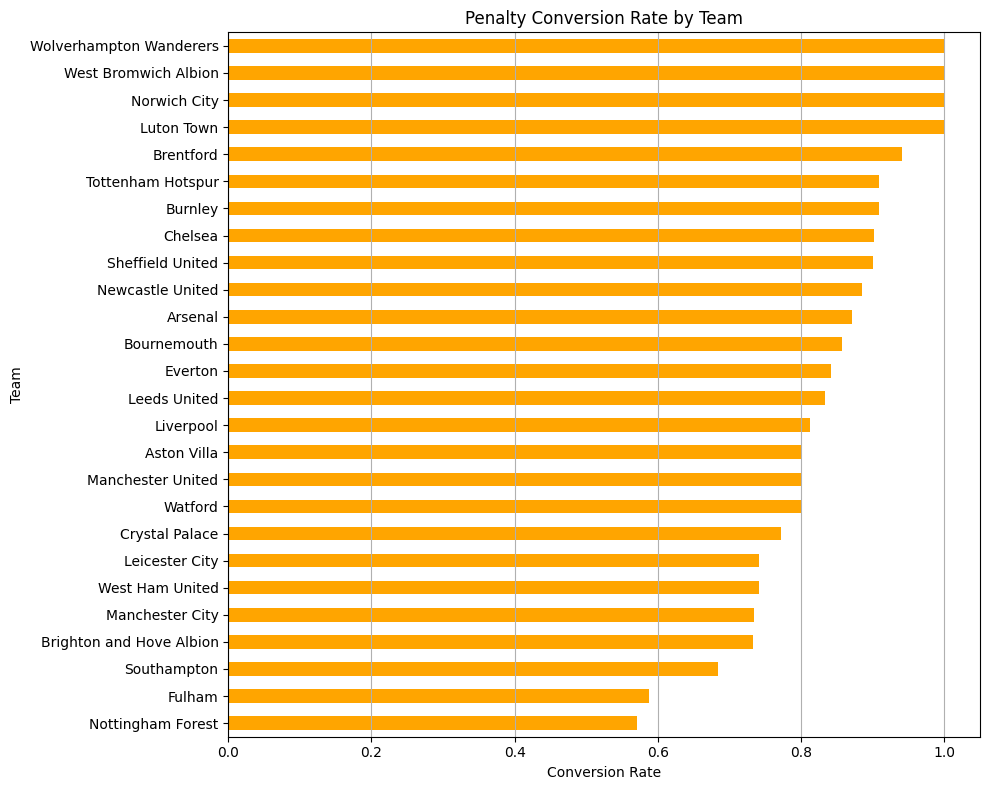

In [ ]:
# Compute penalty conversion rate per team
df_penalty = df.groupby('team')[['pkatt', 'pk']].sum()
df_penalty['conversion_rate'] = df_penalty['pk'] / df_penalty['pkatt']
df_penalty = df_penalty.dropna().sort_values(by='conversion_rate', ascending=True)  # Ascending for horizontal bar

# Horizontal bar
plt.figure(figsize=(10, 8))
df_penalty['conversion_rate'].plot(kind='barh', color='orange')
plt.title('Penalty Conversion Rate by Team')
plt.xlabel('Conversion Rate')
plt.ylabel('Team')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**IV. Shots vs Shots on Target**

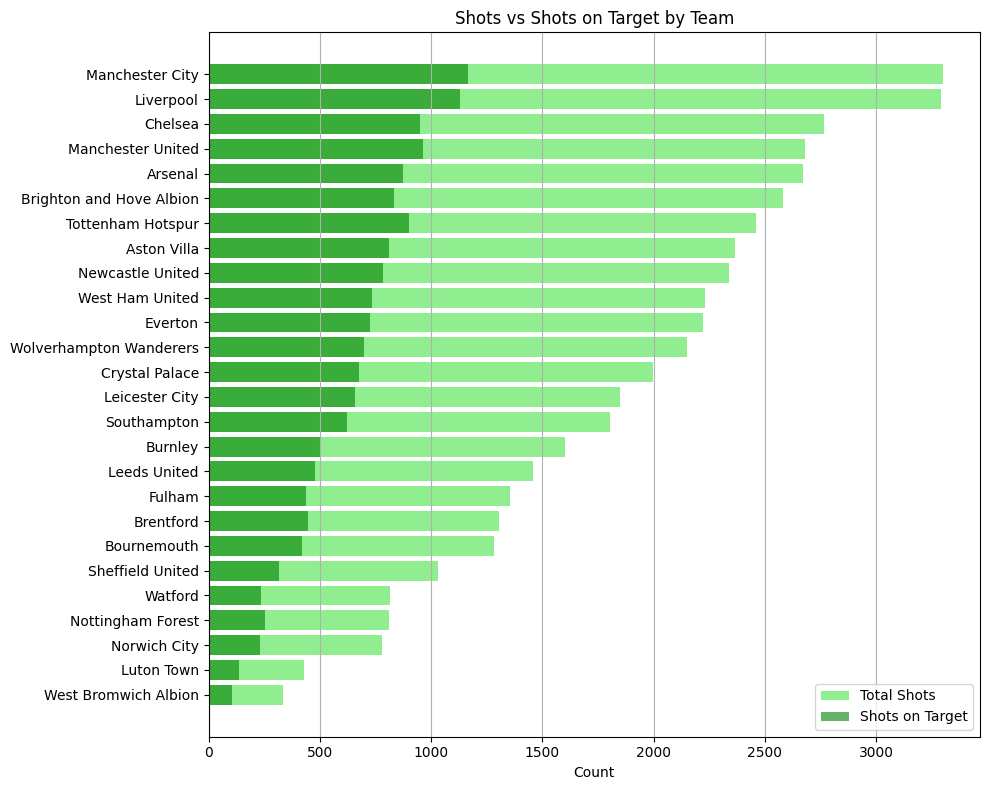

In [ ]:
# Group by team and sum shots and shots on target
df1 = df.groupby('team')[['sh', 'sot']].sum()
df1 = df1.sort_values(by='sh', ascending=True)  # Sort by total shots for clarity

# Horizontal bar
plt.figure(figsize=(10, 8))
plt.barh(df1.index, df1['sh'], color='lightgreen', label='Total Shots')
plt.barh(df1.index, df1['sot'], color='green',alpha=0.6, label='Shots on Target')

plt.xlabel('Count')
plt.title('Shots vs Shots on Target by Team')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

##VI. Team Analysis and Points Table

**I. Head-to-Head Records between two teams**

In [ ]:
from collections import Counter

# List all unique teams
teams = sorted(df['team'].unique())
print("Available Teams:\n")
for i, team in enumerate(teams):
    print(f"{i+1}. {team}")

print("\nEnter two teams to see head-to-head record:")
team1 = input("Enter the first team: ").strip()
team2 = input("Enter the second team: ").strip()

if team1 not in teams or team2 not in teams:
    print("\nInvalid team name(s). Please choose from the available teams above.")
else:
    # Filter head-to-head matches
    head_to_head_df = df[
        ((df['team'] == team1) & (df['opponent'] == team2)) |
        ((df['team'] == team2) & (df['opponent'] == team1))
    ]


    team1_matches = head_to_head_df[head_to_head_df['team'] == team1]
    team2_matches = head_to_head_df[head_to_head_df['team'] == team2]

    team1_results = Counter(team1_matches['result'])
    team2_results = Counter(team2_matches['result'])

    # Step 5: Print results
    print(f"\nHead-to-Head Record Between {team1} and {team2} (from 2020–2024):\n")
    print(f"{team1} - Wins: {team1_results[3]}, Draws: {team1_results[1]}, Losses: {team1_results[0]}")
    print(f"{team2} - Wins: {team2_results[3]}, Draws: {team2_results[1]}, Losses: {team2_results[0]}")

Available Teams:

1. Arsenal
2. Aston Villa
3. Bournemouth
4. Brentford
5. Brighton and Hove Albion
6. Burnley
7. Chelsea
8. Crystal Palace
9. Everton
10. Fulham
11. Leeds United
12. Leicester City
13. Liverpool
14. Luton Town
15. Manchester City
16. Manchester United
17. Newcastle United
18. Norwich City
19. Nottingham Forest
20. Sheffield United
21. Southampton
22. Tottenham Hotspur
23. Watford
24. West Bromwich Albion
25. West Ham United
26. Wolverhampton Wanderers

Enter two teams to see head-to-head record:
Enter the first team: Liverpool 
Enter the second team: Manchester City

Head-to-Head Record Between Liverpool and Manchester City (from 2020–2024):

Liverpool - Wins: 2, Draws: 5, Losses: 3
Manchester City - Wins: 3, Draws: 5, Losses: 2


### **II. Combined Points Table of 2020-24 season**

In [ ]:
df.head(10)

,year,month,date_day,day,time,season,round,venue,team,opponent,...,sot,dist,fk,pk,pkatt,attendance,captain,formation,referee,kickoff_time
0,2020,09,21,Mon,20:15 (21:15),2021,Matchweek 2,Away,Manchester City,Wolves,...,8,21.1,2,1,1,NaN,Fernandinho,4-2-3-1,Andre Marriner,20:15
1,2020,09,27,Sun,16:30 (17:30),2021,Matchweek 3,Home,Manchester City,Leicester City,...,5,19.8,1,0,0,NaN,Fernandinho,4-2-3-1,Michael Oliver,16:30
2,2020,10,03,Sat,17:30 (18:30),2021,Matchweek 4,Away,Manchester City,Leeds United,...,1,18.2,1,0,0,NaN,Kevin De Bruyne,4-3-3,Mike Dean,17:30
3,2020,10,17,Sat,17:30 (18:30),2021,Matchweek 5,Home,Manchester City,Arsenal,...,5,17.7,0,0,0,NaN,Raheem Sterling,3-1-4-2,Chris Kavanagh,17:30
4,2020,10,24,Sat,12:30 (13:30),2021,Matchweek 6,Away,Manchester City,West Ham,...,7,20.9,1,0,0,NaN,Raheem Sterling,4-3-3,Anthony Taylor,12:30
5,2020,10,31,Sat,12:30 (14:30),2021,Matchweek 7,Away,Manchester City,Sheffield Utd,...,8,18.5,2,0,0,NaN,Kevin De Bruyne,4-3-3,Michael Oliver,12:30
6,2020,11,08,Sun,16:30 (18:30),2021,Matchweek 8,Home,Manchester City,Liverpool,...,2,20.6,0,0,1,NaN,Kevin De Bruyne,4-2-3-1,Craig Pawson,16:30
7,2020,11,21,Sat,17:30 (19:30),2021,Matchweek 9,Away,Manchester City,Tottenham,...,5,16.0,0,0,0,NaN,Kevin De Bruyne,4-3-3,Mike Dean,17:30
8,2020,11,28,Sat,15:00 (17:00),2021,Matchweek 10,Home,Manchester City,Burnley,...,6,16.4,0,0,0,NaN,Kevin De Bruyne,4-2-3-1,Lee Mason,15:00
9,2020,12,05,Sat,15:00 (17:00),2021,Matchweek 11,Home,Manchester City,Fulham,...,4,15.9,0,1,1,NaN,Kevin De Bruyne,4-2-3-1,Jonathan Moss,15:00


In [ ]:
import pandas as pd

teams = df['team'].unique()

# Initialize lists
wins = []
losses = []
draws = []
goals_for = []
goals_against = []
goal_diff = []
points = []

# Loop through each team and calculate stats
for team in teams:
    team_df = df[df['team'] == team]

    w = (team_df['result'] == 3).sum()
    l = (team_df['result'] == 0).sum()
    d = (team_df['result'] == 1).sum()

    gf = team_df['gf'].sum()
    ga = team_df['ga'].sum()
    gd = gf - ga
    pt = (w * 3) + (d * 1)

    wins.append(w)
    losses.append(l)
    draws.append(d)
    goals_for.append(gf)
    goals_against.append(ga)
    goal_diff.append(gd)
    points.append(pt)

# Create Points Table DataFrame
points_table = pd.DataFrame({
    'Team': teams,
    'Matches': [w + l + d for w, l, d in zip(wins, losses, draws)],
    'Wins': wins,
    'Draws': draws,
    'Losses': losses,
    'GF': goals_for,
    'GA': goals_against,
    'GD': goal_diff,
    'Points': points
})


points_table = points_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

points_table

,Team,Matches,Wins,Draws,Losses,GF,GA,GD,Points
0,Manchester City,190,138,26,26,474,160,314,440
1,Liverpool,190,123,40,27,408,189,219,409
2,Arsenal,190,108,35,47,351,207,144,359
3,Manchester United,190,96,45,49,311,238,73,333
4,Tottenham Hotspur,190,94,36,60,342,256,86,318
5,Chelsea,190,89,47,54,318,233,85,314
6,Newcastle United,190,73,50,67,281,277,4,269
7,Aston Villa,190,76,36,78,275,274,1,264
8,West Ham United,190,70,42,78,273,289,-16,252
9,Brighton and Hove Albion,190,60,63,67,248,259,-11,243


**Correlation Matrix** - Analyzing the relationships between numeric features


In [ ]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

              season        gf        ga    result        xg       xga  \
season      1.000000  0.069362  0.069362  0.002230  0.082429  0.082429   
gf          0.069362  1.000000 -0.160501  0.665695  0.615471 -0.195026   
ga          0.069362 -0.160501  1.000000 -0.619969 -0.195026  0.615471   
result      0.002230  0.665695 -0.619969  1.000000  0.453607 -0.433309   
xg          0.082429  0.615471 -0.195026  0.453607  1.000000 -0.281839   
xga         0.082429 -0.195026  0.615471 -0.433309 -0.281839  1.000000   
poss       -0.000058  0.180099 -0.180091  0.154259  0.367565 -0.367561   
sh          0.086798  0.352480 -0.194045  0.286487  0.694996 -0.334236   
sot         0.069651  0.596608 -0.176811  0.437288  0.651678 -0.242396   
dist       -0.096297 -0.155769  0.029549 -0.093516 -0.277901  0.029411   
fk         -0.071249  0.028395 -0.033748  0.047007  0.081298 -0.085854   
pk          0.011118  0.270726 -0.025947  0.184701  0.336967 -0.064109   
pkatt       0.002014  0.250222 -0.0294

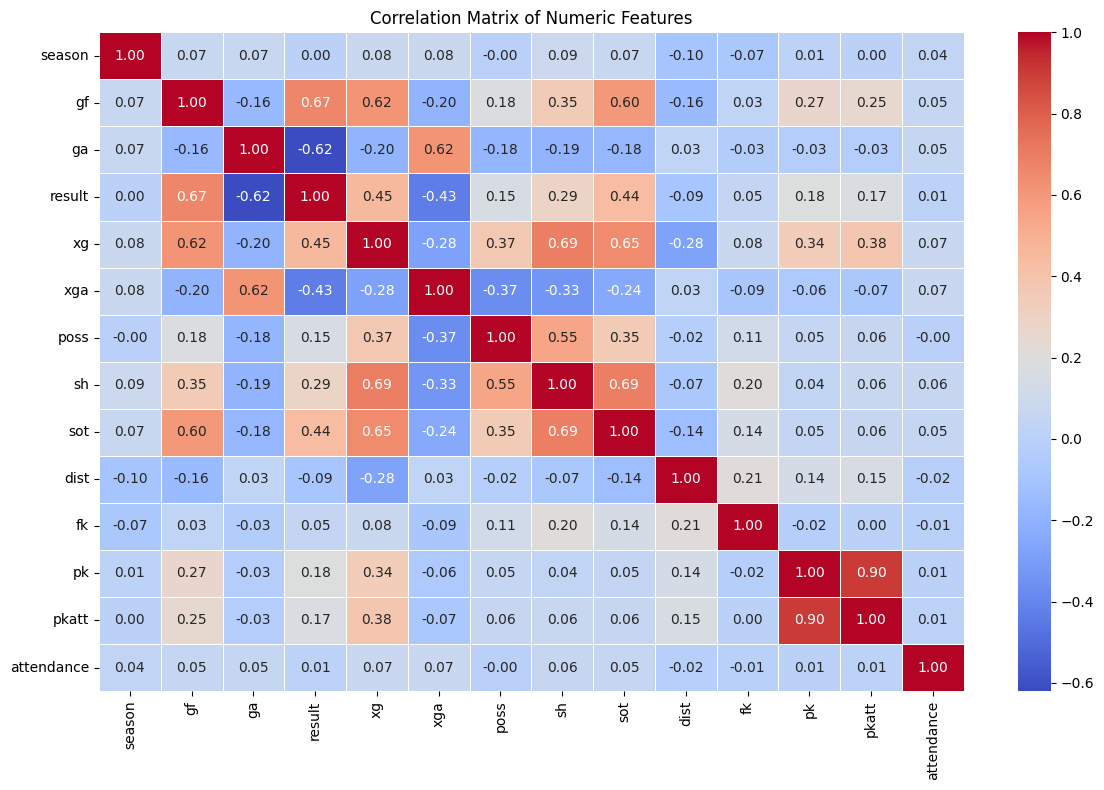

In [ ]:
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

####**Key Insights**:

1. `gf` vs `result`: **0.67**

* Higher goals for are strongly correlated with better match results. Makes sense—more goals usually mean wins.

2. `ga` vs `result`: **-0.62**

* More goals conceded is negatively correlated with match outcomes. Again, expected.

3. `xg` vs `gf`: **0.62**

* A solid positive correlation between expected goals and actual goals scored. Suggests good predictive accuracy of xg.

4. `sh` vs `sot`: **0.69**

* Strong correlation between shots and shots on target. Again, logical.

5. `pkatt` vs `pk`: **0.90**

* Penalty kick attempts and penalty kicks scored are almost perfectly correlated. Consistency in execution.

6. `xga` vs `ga`: **0.62**

* Good positive correlation between expected goals against and actual goals against.

**Low or no correlation (values near 0)**:

* Features like `attendance`, `fk`, and `season` show **little to no correlation** with most variables. This means they may not have a direct statistical relationship with in-game performance.

**Normalization** - Using MinMax Formula

In [ ]:
num_df = df.select_dtypes(include='number')

data = num_df.to_numpy()

print("Dataset Shape: ", data.shape)
print("\nDataset Preview: \n", data[:5])

Dataset Shape:  (3800, 14)

Dataset Preview: 
 [[2.021e+03 3.000e+00 1.000e+00 3.000e+00 1.900e+00 6.000e-01 6.500e+01
  1.300e+01 8.000e+00 2.110e+01 2.000e+00 1.000e+00 1.000e+00       nan]
 [2.021e+03 2.000e+00 5.000e+00 0.000e+00 9.000e-01 2.900e+00 7.200e+01
  1.600e+01 5.000e+00 1.980e+01 1.000e+00 0.000e+00 0.000e+00       nan]
 [2.021e+03 1.000e+00 1.000e+00 1.000e+00 1.200e+00 2.400e+00 4.900e+01
  2.300e+01 1.000e+00 1.820e+01 1.000e+00 0.000e+00 0.000e+00       nan]
 [2.021e+03 1.000e+00 0.000e+00 3.000e+00 1.300e+00 9.000e-01 5.800e+01
  1.300e+01 5.000e+00 1.770e+01 0.000e+00 0.000e+00 0.000e+00       nan]
 [2.021e+03 1.000e+00 1.000e+00 1.000e+00 1.000e+00 3.000e-01 6.900e+01
  1.400e+01 7.000e+00 2.090e+01 1.000e+00 0.000e+00 0.000e+00       nan]]


In [ ]:
min_val = np.min(data, axis=0)
max_val = np.max(data, axis=0)

normalized_data = (data - min_val) / (max_val - min_val)
print(f"Normalized Data \n {normalized_data}")

Normalized Data 
 [[0.25       0.33333333 0.11111111 ... 0.33333333 0.33333333        nan]
 [0.25       0.22222222 0.55555556 ... 0.         0.                nan]
 [0.25       0.11111111 0.11111111 ... 0.         0.                nan]
 ...
 [0.         0.         0.11111111 ... 0.         0.                nan]
 [0.         0.         0.22222222 ... 0.         0.                nan]
 [0.         0.         0.55555556 ... 0.         0.                nan]]


## **6. BASIC PREDICTIVE MODELING**

In this section, we use team performance stats from 2020–2024 to build a simple predictive model. Key features like wins, goals scored, goal difference, and points help us train models (e.g., Logistic Regression or Random Forest) to predict outcomes such as match results or rankings

In [ ]:
df.columns

Index(['year', 'month', 'date_day', 'day', 'time', 'season', 'round', 'venue',
       'team', 'opponent', 'gf', 'ga', 'result', 'xg', 'xga', 'poss', 'sh',
       'sot', 'dist', 'fk', 'pk', 'pkatt', 'attendance', 'captain',
       'formation', 'referee', 'kickoff_time'],
      dtype='object')

In [ ]:
df.drop(columns = ['year', 'month', 'date_day', 'day', 'time', 'kickoff_time','round', 'venue', 'attendance', 'formation', 'captain','referee', 'team', 'opponent'], axis=1, inplace=True)
df

/tmp/ipython-input-52-2479867793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['year', 'month', 'date_day', 'day', 'time', 'kickoff_time','round', 'venue', 'attendance', 'formation', 'captain','referee', 'team', 'opponent'], axis=1, inplace=True)


,season,gf,ga,result,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
0,2021,3,1,3,1.9,0.6,65,13,8,21.1,2,1,1
1,2021,2,5,0,0.9,2.9,72,16,5,19.8,1,0,0
2,2021,1,1,1,1.2,2.4,49,23,1,18.2,1,0,0
3,2021,1,0,3,1.3,0.9,58,13,5,17.7,0,0,0
4,2021,1,1,1,1.0,0.3,69,14,7,20.9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020,1,2,0,1.2,1.2,56,12,3,16.9,1,0,0
4784,2020,0,4,0,0.6,3.5,53,11,2,19.8,1,0,0
4785,2020,0,1,0,0.1,2.5,33,2,0,20.6,0,0,0
4786,2020,0,2,0,0.3,1.8,42,6,2,13.4,0,0,0


In [ ]:
df.head()

,season,gf,ga,result,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
0,2021,3,1,3,1.9,0.6,65,13,8,21.1,2,1,1
1,2021,2,5,0,0.9,2.9,72,16,5,19.8,1,0,0
2,2021,1,1,1,1.2,2.4,49,23,1,18.2,1,0,0
3,2021,1,0,3,1.3,0.9,58,13,5,17.7,0,0,0
4,2021,1,1,1,1.0,0.3,69,14,7,20.9,1,0,0


**Features(x) and Target(y)**

In [ ]:
x = df.drop('result', axis=1)
x

,season,gf,ga,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
0,2021,3,1,1.9,0.6,65,13,8,21.1,2,1,1
1,2021,2,5,0.9,2.9,72,16,5,19.8,1,0,0
2,2021,1,1,1.2,2.4,49,23,1,18.2,1,0,0
3,2021,1,0,1.3,0.9,58,13,5,17.7,0,0,0
4,2021,1,1,1.0,0.3,69,14,7,20.9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020,1,2,1.2,1.2,56,12,3,16.9,1,0,0
4784,2020,0,4,0.6,3.5,53,11,2,19.8,1,0,0
4785,2020,0,1,0.1,2.5,33,2,0,20.6,0,0,0
4786,2020,0,2,0.3,1.8,42,6,2,13.4,0,0,0


In [ ]:
y = df['result']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Train-Test Split (80% train, 20% test)**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [ ]:
print("Features shape: ",x.shape)
print("Target shape: ",y.shape)
print("Training feature shape:", x_train.shape)
print("Test feature shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Features shape:  (3800, 12)
Target shape:  (3800,)
Training feature shape: (3040, 12)
Test feature shape: (760, 12)
Training labels shape: (3040,)
Test labels shape: (760,)


**Fitting the model to training data**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Making Predictions**

In [ ]:
# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

**Accuracy Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy:", round(train_accuracy, 4))
print("Test Accuracy:", round(test_accuracy, 4))

Training Accuracy: 0.8151
Test Accuracy: 0.7895


In [ ]:
print(df['result'].value_counts(normalize=True))

result
3    0.386316
0    0.386316
1    0.227368
Name: proportion, dtype: float64


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_preds)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[260  22   7]
 [ 26 101  66]
 [  0  39 239]]


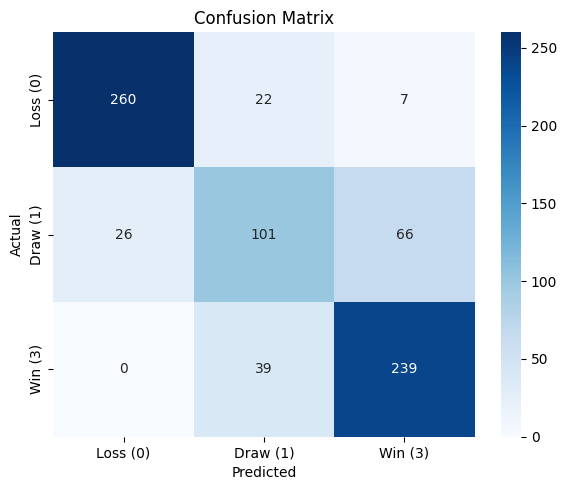

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Loss (0)', 'Draw (1)', 'Win (3)'],
            yticklabels=['Loss (0)', 'Draw (1)', 'Win (3)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, test_preds, target_names=["Loses", "Draws", "Wins"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       Loses       0.91      0.90      0.90       289
       Draws       0.62      0.52      0.57       193
        Wins       0.77      0.86      0.81       278

    accuracy                           0.79       760
   macro avg       0.77      0.76      0.76       760
weighted avg       0.78      0.79      0.78       760



In [ ]:
df.head()

,season,gf,ga,result,xg,xga,poss,sh,sot,dist,fk,pk,pkatt
0,2021,3,1,3,1.9,0.6,65,13,8,21.1,2,1,1
1,2021,2,5,0,0.9,2.9,72,16,5,19.8,1,0,0
2,2021,1,1,1,1.2,2.4,49,23,1,18.2,1,0,0
3,2021,1,0,3,1.3,0.9,58,13,5,17.7,0,0,0
4,2021,1,1,1,1.0,0.3,69,14,7,20.9,1,0,0


**Predicting Match Result for a New Input Sample**

In [ ]:
# columns used during training
features = ['season', 'gf', 'ga', 'xg', 'xga', 'poss', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']

# input as a single-row DataFrame
input_data = pd.DataFrame([[2021, 3, 1, 1.9, 0.6, 65, 13, 8, 21.1, 2, 1, 1]], columns=features)

# Predict
prediction = model.predict(input_data)

# Map result
result_map = {0: "Lose", 1: "Draw", 3: "Win"}
predicted_result = result_map.get(prediction[0], "Unknown")

print("Predicted Match Result:", predicted_result)

Predicted Match Result: Win


## **7.  CONCLUSION**

Overall Model Performance
The logistic regression model achieved a solid accuracy of ~79%, indicating its ability to predict football match outcomes (Win, Lose, Draw) based on pre-match statistics with decent reliability.

Influential Features Identified
Features like 'goals for (gf)', 'expected goals (xg)', 'shots on target (sot)', and 'possession (poss)' emerged as key indicators impacting match outcomes, as observed from the correlation heatmap and classification metrics.

Prediction Reliability Across Outcomes
The model was most accurate in predicting Wins and Losses, while Draws were harder to classify accurately, as seen in the confusion matrix and classification report.

Balanced Dataset Distribution
The target class 'result' showed a reasonable distribution among Wins, Losses, and Draws, ensuring that the model didn’t suffer from extreme class imbalance.

Practical Prediction Test
A real-world test using manually input match statistics resulted in a successful prediction, demonstrating the model’s applicability in forecasting match results using historical data patterns.

Comprehensive Data Pipeline
From data cleaning and feature selection to model training and evaluation, the entire machine learning pipeline was implemented in a systematic and interpretable way, aligning well with industry-standard practices.